## Estimating a Difference in Population Proportions and Means with Confidence

### Population proportion
Research question: considering all adults in the United States, is the proportion of females who smoke higher than the proportion of males who smoke?

Population: all adults in the United States

Parameter of interest: difference in population proportion of adults who smoke

Assumptions:

- This data set is a simple random sample. 

- Our data set is 'large' enough(at least 10 yes's and no's in our sample) 

We estimate with 95% confidence that the proportion of females who smoke is between 0.23 and 0.18 points lower than the proportion of males who smoke

### Population mean
Research question: considering all adults in the United States, is the body mass index of males higher that the body mass index of females? 

Population: all adults in the United States

Parameter of interest: difference in population body mass index mean 

Assumptions:

- This data set is a simple random sample. 

- Our data set is 'large' enough(at least 10 yes's and no's in our sample

We estimate with 95% confidence that the population mean of females' BMI is between .7985 and 1.5252 higher than the population mean of males' BMI



In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

In [4]:
da.shape

(5735, 28)

In [5]:
da.head()


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Variables that I will use for the CI calculations:

SMQ020 = whether the person smokes or not. Number 1 means that the person smokes and 2 that the person does not smoke 

RIAGENDR = gender in numbers where 1 is equal to female and 2 is equal to male

BMXBMI = body mass index (BMI) 




## Investigating and cleaning our data set for the confidence interval calculation

In [17]:
da['SMQ020'].unique()

array([1, 2, 7, 9], dtype=int64)

In [6]:
""" Changing SMQ020 from 1/2 to Yes/No into new variable SMQ020x and dropping other 
values that would not be valuable for this example. 7= occasionally, 9= often""" 

da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [12]:
# Changing RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [13]:
#New data set containing only the variables for our analysis
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [14]:
dx

,SMQ020x,RIAGENDRx
0,Yes,Male
1,Yes,Male
2,Yes,Male
3,No,Female
4,No,Female
...,...,...
5730,Yes,Female
5731,No,Male
5732,Yes,Female
5733,Yes,Male


In [15]:
# Changing SMQ020x from Yes/No to 1/0 into existing variable SMQ020x to perform quantitative calculations 
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [16]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


### Constructing Confidence Intervals

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals.  

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error (SE) is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

#### Difference of Two Population Proportions

In [17]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [18]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [19]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [20]:
d = .304845 - .513258
lb = d - 1.96 * se_diff
ub = d + 1.96 * se_diff
(lb, ub)

(-0.23336356545788706, -0.18346243454211297)

## Interpretation
#### We estimate with 95% confidence that the proportion of females who smoke is between 0.23 and 0.18 points lower than the proportion of males who smoke.

#### Difference of Two Population Means

In [21]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [22]:
da["BMXBMI"].describe()

count    5662.000000
mean       29.382197
std         7.095921
min        14.500000
25%        24.300000
50%        28.300000
75%        33.000000
max        67.300000
Name: BMXBMI, dtype: float64

'Body Mass Index Stratified by Gender'

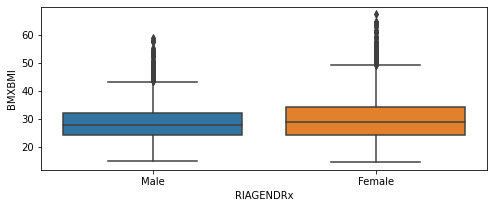

In [23]:
plt.figure(figsize=(8, 3))
sns.boxplot(y="BMXBMI" ,x = "RIAGENDRx" ,data=da).set_title
('Body Mass Index Stratified by Gender') 

In [24]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [31]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [32]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [33]:
d = 29.939946 - 28.778072

In [34]:
lb = d - 1.96 * sem_diff
ub = d + 1.96 * sem_diff
(lb, ub)

(0.798509725476467, 1.5252382745235278)

## Interpretation
### We estimate with 95% confidence that the population mean of females' BMI is between .7985  and 1.5252 higher than the population mean of males' BMI 